# Introduction
This project examines video game data to identify trends in which games succeed and which do not to better allocate advertising funding for Ice.  After loading and cleaning the data, I will identify trends in which platforms and genres are most popular in the North American, European, and Japanese markets.  I will also examine whether user and critic reviews and ESRB ratings affect sales.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as stats
games = pd.read_csv('games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Upon loading the dataset, we can see that our data set contains data for over 16k video games.  Platform and sales data is all intact.  There are some bizarre gaps in the data, however.  There are 2 entries that are missing name and genre; I will fill these with "Unknown."  Year_of_Release is missing for 269 games.  After converting the data type to integer type, I will fill these rows with the median value as it is a small portion of the games (< 2%), but I do not wish to drop rows with other valuable data about genre and platform given the nature of our inquiry.  Critic and User Scores and Rating are missing for a large portion of the games, possibly due to being older games.  After converting User_Score to float, I will fill these rows with the median value for games in the same genre and platform.

In [3]:
games['Name'] = games['Name'].fillna('Unknown')

In [4]:
games['Genre'] = games['Genre'].fillna('Unknown')

In [5]:
name_genre_missing = games[games['Name'].isnull()]
name_genre_missing

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


Missing names and genres have been replaced with filler value.

In [6]:
games['Year_of_Release'] = games['Year_of_Release'].transform(lambda x:x.fillna(x.median()))
games['Year_of_Release'] = games['Year_of_Release'].astype(int)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16715 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16715 non-null  int64  
 3   Genre            16715 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Missing values in Year_of_Release have been filled with the median value and converted to integer data type.

In working toward converting the User_Score to a float data type and filling missing data with the median score, I encountered an error with rows that contained "tbd."  Given these games were released in the 2000s and early 2010s, it seems reasonable to assume the User_Score will not be determined and is, essentially, a null value.  I will therefore convert it to such before filling all tbd and existing NaN values with the median value for its Platform and Genre.

In [7]:
games.loc[games['User_Score'].str.contains('tbd', na=False), 'User_Score'] = np.nan
score_tbd = games[games['User_Score'].str.contains('tbd', na=False)]
score_tbd

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


In [8]:
games['User_Score'] = games['User_Score'].astype(float)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16715 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16715 non-null  int64  
 3   Genre            16715 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       7590 non-null   float64
 10  Rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
plat_genre_med = games.groupby(['Platform', 'Genre'])['User_Score'].median()
plat_genre_med

Platform  Genre       
2600      Action           NaN
          Adventure        NaN
          Fighting         NaN
          Misc             NaN
          Platform         NaN
                          ... 
XOne      Role-Playing    7.20
          Shooter         6.90
          Simulation      6.30
          Sports          5.85
          Strategy        7.50
Name: User_Score, Length: 294, dtype: float64

While I had hoped to fill by medians for both Platform and Genre for a more accurate filler value, it is clear that data does not exist for some combinations of Platform and Genre.  Therefore, I will fill as many values as possible by both data points and use Genre median, then Platform median only for outliers.

In [10]:
print('Before fillna, the number of NaN values remaining is:', games['User_Score'].isnull().sum())
games['User_Score'] = games.groupby(['Platform', 'Genre'])['User_Score'].transform(lambda x:x.fillna(x.median()))
print('After fillna with median for Platform and Genre, the number of NaN values remaining is:', games['User_Score'].isnull().sum())
games['User_Score'] = games.groupby('Genre')['User_Score'].transform(lambda x:x.fillna(x.median()))
print('After fillna with median for Genre only, the number of NaN values remaining is:', games['User_Score'].isnull().sum())
games['User_Score'] = games.groupby('Platform')['User_Score'].transform(lambda x:x.fillna(x.median()))
print('After fillna with median for Platform only, the number of NaN values remaining is:', games['User_Score'].isnull().sum())

Before fillna, the number of NaN values remaining is: 9125
After fillna with median for Platform and Genre, the number of NaN values remaining is: 1127
After fillna with median for Genre only, the number of NaN values remaining is: 2
After fillna with median for Platform only, the number of NaN values remaining is: 0


/Users/lydiaethridge/Documents/GitHub/game_project/.venv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lydiaethridge/Documents/GitHub/game_project/.venv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lydiaethridge/Documents/GitHub/game_project/.venv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lydiaethridge/Documents/GitHub/game_project/.venv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lydiaethridge/Documents/GitHub/game_project/.venv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  retur

In [11]:
games['Critic_Score'] = games.groupby(['Platform', 'Genre'])['Critic_Score'].transform(lambda x:x.fillna(x.median()))
print('After fillna with median for Platform and Genre, the number of NaN values remaining is:', games['Critic_Score'].isnull().sum())
games['Critic_Score'] = games.groupby('Genre')['Critic_Score'].transform(lambda x:x.fillna(x.median()))
print('After fillna with median value for Genre only, the number of NaN values remaining is:', games['Critic_Score'].isnull().sum())
games['Critic_Score'] = games.groupby('Platform')['Critic_Score'].transform(lambda x:x.fillna(x.median()))
print('After fillna with median value for Platform only, the number of NaN values remaining is:', games['Critic_Score'].isnull().sum())

After fillna with median for Platform and Genre, the number of NaN values remaining is: 1134
After fillna with median value for Genre only, the number of NaN values remaining is: 2
After fillna with median value for Platform only, the number of NaN values remaining is: 0


/Users/lydiaethridge/Documents/GitHub/game_project/.venv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lydiaethridge/Documents/GitHub/game_project/.venv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lydiaethridge/Documents/GitHub/game_project/.venv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lydiaethridge/Documents/GitHub/game_project/.venv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lydiaethridge/Documents/GitHub/game_project/.venv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  retur

In [12]:
games['Rating'] = games['Rating'].fillna('Unknown')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70.0,7.80,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.0,7.80,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.20,Unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,73.0,6.60,Unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,72.0,7.60,Unknown
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,8.05,Unknown


User_Score is now float data type and all null scores have been replaced with the median value for their Platform and Genre or Genre only if available, then Platform only if available.  Additionally, missing ratings were replaced with "Unknown."

I will now transform column names to lower case to simplify code going forward and add an additional column with information on global sales.

In [13]:
games.columns = map(str.lower, games.columns)
games


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70.0,7.80,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.0,7.80,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.20,Unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,73.0,6.60,Unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,72.0,7.60,Unknown
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,8.05,Unknown


In [14]:
games['global_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70.0,7.80,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.0,7.80,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.20,Unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,73.0,6.60,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,72.0,7.60,Unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,8.05,Unknown,0.01


# Exploratory Analysis
Now that the data is ready, I will begin some basic analysis to plan which data to include in my final analysis for the most accurate predictions.  I will begin with determining if my analysis should include data from all years.

In [15]:
games_by_year = games.groupby('year_of_release').agg(count=('year_of_release', 'count')).reset_index()
games_by_year

,year_of_release,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


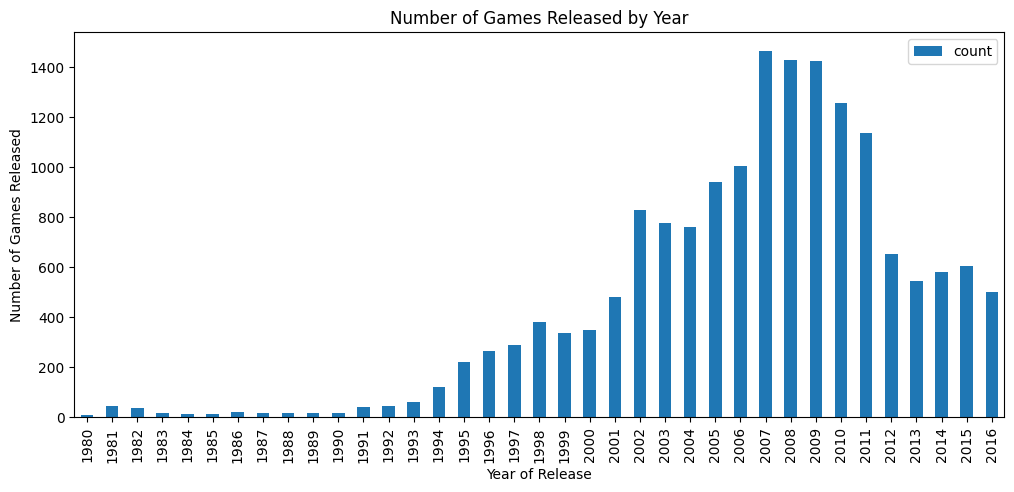

In [16]:
games_by_year.plot(kind='bar', x='year_of_release', y='count', title='Number of Games Released by Year', xlabel='Year of Release', ylabel='Number of Games Released', figsize=[12, 5])
plt.show()

In [17]:
games_by_year['count'].describe()

count      37.000000
mean      451.756757
std       465.945777
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1466.000000
Name: count, dtype: float64

This data set contains data 1980-2016.  Video game releases hit a high-point during this time--2007 with 1466 games--a significant increase over 1980 when only 9 games were released!  Due to this large degree of variation, means skew lower than they otherwise might.  As a result, it would be best to focus this inquiry on games released since 1998 to incorporate only years where the number of releases is above the median and more comparable to the number of releases in the present day.

In [18]:
percentile_50 = games_by_year['count'].quantile(0.5)
filtered_gby = games_by_year[games_by_year['count'] >= percentile_50]
filtered_gby

,year_of_release,count
18,1998,379
19,1999,338
20,2000,350
21,2001,482
22,2002,829
23,2003,775
24,2004,762
25,2005,939
26,2006,1006
27,2007,1466


In [19]:
filtered_gby.describe()

,year_of_release,count
count,19.000000,19.000000
mean,2007.000000,813.473684
std,5.627314,377.532540
min,1998.000000,338.000000
25%,2002.500000,523.000000
50%,2007.000000,762.000000
75%,2011.500000,1071.000000
max,2016.000000,1466.000000


This is much more reflective of recent game release trends!

I will now investigate platform popularity over time.  For this analysis, I will look at the entire initial data set.

In [20]:
sales_by_platform = games.groupby(['year_of_release', 'platform']).agg(total_sbp=('global_sales', 'sum')).reset_index()
sbp_pivot = sales_by_platform.pivot(index='year_of_release', columns='platform', values='total_sbp')
tsal = sbp_pivot.sum().rename('Total')
tsal_df = pd.DataFrame(tsal).T
sbp_with_total = pd.concat([sbp_pivot, tsal_df])
sbp_with_total

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,0.63,NaN,NaN,NaN,NaN,64.97,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It is worth noting before proceeding that there may be some irregularities in this data given some of the outliers evident above, e.g. DS recording 20,000 in sales in 1985 despite not being released until 2004.  These cases are rare, however, and have minimal impact on the data or may have an explanation of which I am not aware such as an attempted revival of the platform, anniversary rerelease, etc.

In [21]:
platform_stats = sbp_pivot.describe()
platform_stats

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
count,11.000000,2.000000,7.000000,7.000000,11.000000,14.000000,8.000000,7.000000,5.00000,1.00,...,6.000000,2.000000,10.000000,1.00,3.000000,11.000000,5.000000,12.000000,9.000000,4.000000
mean,8.816364,0.050000,37.000000,2.278571,73.283636,18.247143,39.731250,28.418571,6.15400,0.04,...,5.598333,0.930000,20.004000,0.16,0.473333,82.500909,16.438000,80.951667,28.637778,39.830000
std,12.374968,0.042426,22.973014,2.543550,62.080572,18.420232,32.033388,18.314305,4.22616,NaN,...,3.967591,0.806102,15.479666,NaN,0.200333,80.753630,7.068244,57.805055,25.701079,20.313977
min,0.270000,0.020000,1.190000,0.020000,0.020000,1.030000,0.070000,2.470000,2.60000,0.04,...,0.090000,0.360000,0.220000,0.16,0.280000,0.180000,4.600000,1.520000,0.180000,18.960000
25%,0.650000,0.035000,21.460000,0.165000,14.140000,5.060000,7.597500,18.800000,3.07000,0.04,...,3.692500,0.645000,4.722500,0.16,0.370000,6.170000,16.350000,29.045000,6.720000,24.352500
50%,1.940000,0.050000,43.760000,1.070000,85.020000,10.710000,45.265000,27.620000,4.33000,0.04,...,5.295000,0.930000,21.185000,0.16,0.460000,59.650000,17.560000,94.160000,22.260000,40.110000
75%,10.940000,0.065000,53.965000,4.270000,124.975000,26.547500,64.687500,39.715000,8.13000,0.04,...,7.460000,1.215000,32.785000,0.16,0.570000,153.125000,21.650000,124.032500,49.080000,55.587500
max,35.680000,0.080000,63.200000,5.990000,150.280000,64.970000,77.910000,51.810000,12.64000,0.04,...,11.570000,1.500000,40.020000,0.16,0.680000,206.970000,22.030000,170.030000,65.420000,60.140000


In [22]:
count_stats = platform_stats.loc['count']
count_stats.describe()



count    31.000000
mean      7.870968
std       5.136419
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: count, dtype: float64

In [23]:
sales_stats = platform_stats.loc['max']
sales_stats.describe()

count     31.000000
mean      61.831613
std       65.175182
min        0.030000
25%        8.780000
50%       51.810000
75%       71.665000
max      211.810000
Name: max, dtype: float64

This data set is expansive, including data for 31 different platforms over 36 years.  For more meaningful analysis to occur, I will focus my inquiry on those platforms with the greatest total sales.  The typical platform remains popular for 2-12 years on average.  Unsurprisingly, PC platform gaming far exceeds this average with 26 years of game releases.  Other notable platforms are:
* 2600
* DS
* GB
* NES
* PS
* PS2
* PS3
* PSP
* Wii
* X360
  
However, in terms of greatest global sales, total sales have, in general, increased over time.  Therefore, sales data must also be considered in determining the most important platforms to study.  The median platform achieved 51 million in sales.  Any platform exceeding 71 million (75th percentile) is exceptional and will be the focus of further inquiry.  These platforms are:
* DS
* GBA
* PS
* PS2
* PS3
* PS4
* Wii
* X360
  
Given this inquiry focuses more on ability to generate sales and given my earlier conclusion that more recent release data is the most relevant, I will primarily focus on platforms with the greatest sales, as all of the platforms achieved popularity after 1998, with the exception of PlayStation, which was still popular at that time but had been released in 1994.  
  
Now, let's narrow our focus further to which platforms have potential to generate the most sales in 2017.

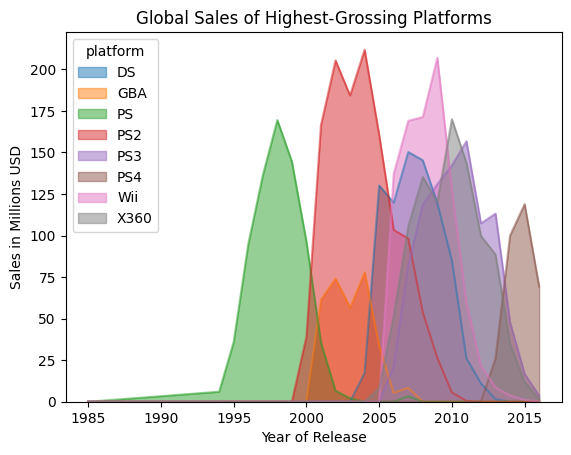

In [24]:
platforms_high_sales = games.groupby(['platform', 'year_of_release']).agg(total_sales = ('global_sales', 'sum')).reset_index()
platforms_to_include = ['DS', 'GBA', 'PS', 'PS2', 'PS3', 'PS4', 'Wii', 'X360']
platforms_filtered = platforms_high_sales[platforms_high_sales['platform'].isin(platforms_to_include)]
platforms_filtered_pivot = platforms_filtered.pivot(index='year_of_release', columns='platform', values='total_sales').fillna(0)
platforms_filtered_pivot.plot.area(stacked=False, title='Global Sales of Highest-Grossing Platforms', xlabel='Year of Release', ylabel='Sales in Millions USD')
plt.show()

The company should focus its advertising campaign for 2017 on PS4 games.  PS4 has consumed the marketshares of other platforms since its introduction and earlier versions of the PlayStation have historically shown impressive staying power in the market, maintaining popularity until the newest version is released.

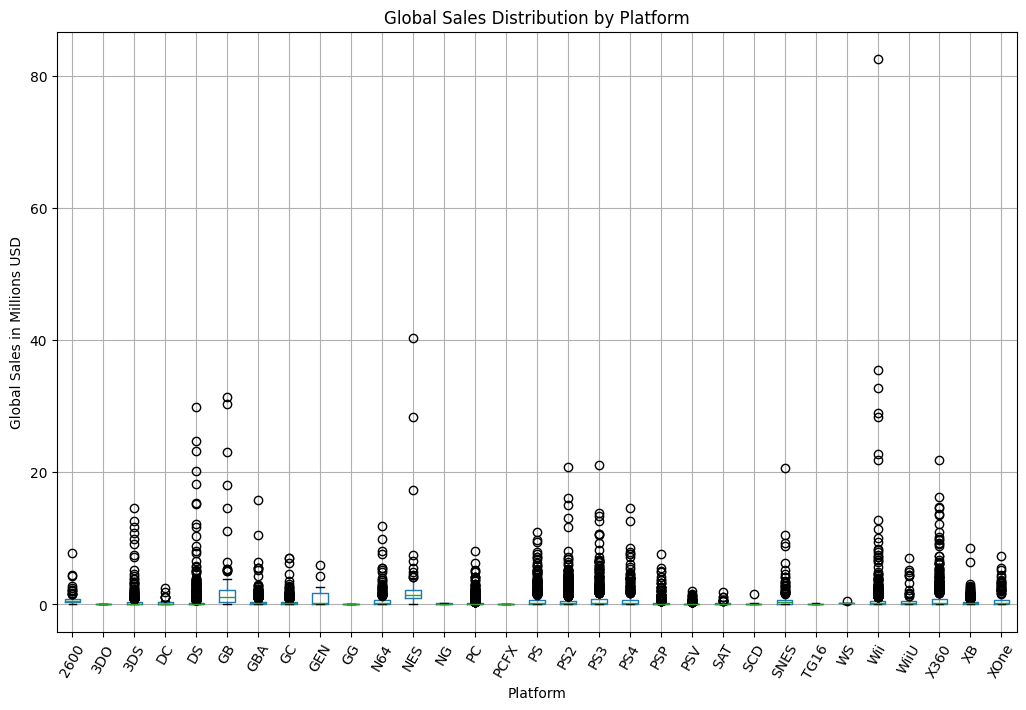

In [25]:
games.boxplot(column='global_sales', by='platform', figsize=(12, 8), rot=60)
plt.title('Global Sales Distribution by Platform')
plt.suptitle('')
plt.xlabel('Platform')
plt.ylabel('Global Sales in Millions USD')
plt.show()

Overall, while PS4 is certainly the most popular platform currently, the distribution shows that median sales are roughly the same across all platforms.  However, some platforms have had more runaway successes than others.  Wii, in particular, has had some of the greatest successes, with one game grossing over $80 million, and six others exceeding $20 million.  Other platforms with runaway successes (exceeding $20 million) include DS, GameBoy, NES, PS2, PS3, Super NES, and Xbox 360.  All of these platforms are handhelds or console systems, so the company should stay alert to newly released platforms in these categories, though lacklustre data for WiiU and Xbox One suggests, again, that these successor platforms are not sure bets.
  
I will now turn to examining what degree user and professional reviews have on the sales of games for the PS4.

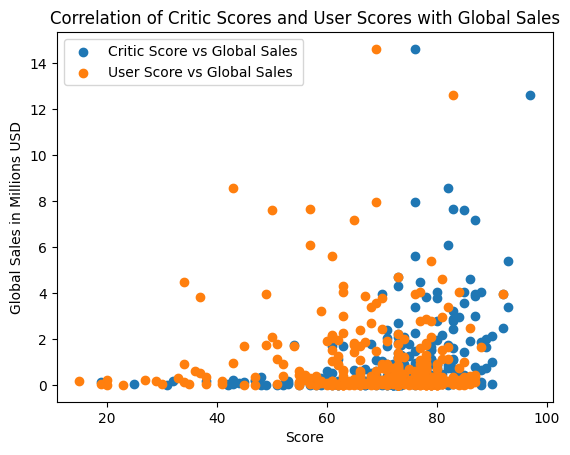

In [26]:
ps4_reviews_sales = games[games['platform'] == 'PS4']
plt.scatter(ps4_reviews_sales['critic_score'], ps4_reviews_sales['global_sales'], label='Critic Score vs Global Sales')
plt.scatter((ps4_reviews_sales['user_score']*10), ps4_reviews_sales['global_sales'], label='User Score vs Global Sales')
plt.title('Correlation of Critic Scores and User Scores with Global Sales')
plt.xlabel('Score')
plt.ylabel('Global Sales in Millions USD')
plt.legend(loc='upper left')
plt.show()

In [27]:
stats.pearsonr(ps4_reviews_sales['critic_score'], ps4_reviews_sales['global_sales'])

PearsonRResult(statistic=0.3347689328109701, pvalue=1.0158709446590476e-11)

In [28]:
stats.pearsonr(ps4_reviews_sales['user_score'], ps4_reviews_sales['global_sales'])

PearsonRResult(statistic=-0.07203316554802237, pvalue=0.1545972953542966)

Critic and User scores have minimal effect on sales for PS4 games.  Critic scores demonstrate a moderate correlation with sales and deserve some attention when determining which games to promote, but user scores have a weak negative correlation and should be ignored.  Is this true only for PS4 or was this true for multi-platform releases?

In [29]:
game_platform_releases = games.groupby('name')['platform'].nunique()
multiplatform_games = game_platform_releases[game_platform_releases > 1].reset_index()
multiplatform_games_ps4 = games[(games['platform'] == 'PS4') & (games['name'].isin(multiplatform_games['name']))]
multiplatform_games_rs = games[games['name'].isin(multiplatform_games_ps4['name'])]
mgrs_pivot = multiplatform_games_rs.pivot(index='name', columns='platform', values='global_sales')
mgrs_top15 = mgrs_pivot.sort_values(by='PS4', ascending=False).head(15).dropna(axis=1, how='all')
mgrs_top15

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,
Call of Duty: Black Ops 3,NaN,0.26,1.69,14.63,NaN,NaN,NaN,1.70,7.39
Grand Theft Auto V,NaN,1.17,21.05,12.62,NaN,NaN,NaN,16.27,5.47
FIFA 16,NaN,0.20,2.70,8.58,NaN,NaN,NaN,1.57,3.25
Star Wars Battlefront (2015),NaN,0.55,NaN,7.98,NaN,NaN,NaN,NaN,3.66
Call of Duty: Advanced Warfare,NaN,0.41,4.36,7.66,NaN,NaN,NaN,4.28,5.26
FIFA 17,NaN,0.12,0.73,7.60,NaN,NaN,NaN,0.38,2.65
Fallout 4,NaN,1.28,NaN,7.17,NaN,NaN,NaN,NaN,4.22
FIFA 15,0.46,0.29,4.28,6.08,0.60,0.56,NaN,2.92,2.18
Destiny,NaN,NaN,1.61,5.64,NaN,NaN,NaN,1.92,3.37


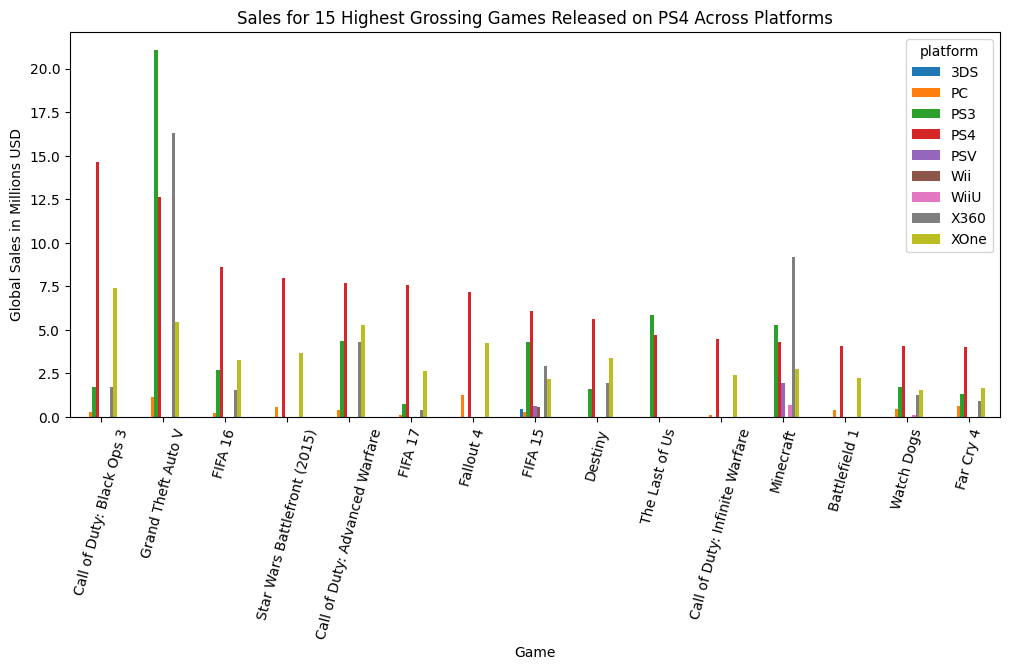

In [30]:
mgrs_top15.plot(kind='bar', title='Sales for 15 Highest Grossing Games Released on PS4 Across Platforms', xlabel='Game', ylabel='Global Sales in Millions USD', figsize=[12, 5], rot=75)
plt.show()

In [31]:
mgrs_bottom15 = mgrs_pivot.sort_values(by='PS4', ascending=False).tail(15).dropna(axis=1, how='all')
mgrs_bottom15

platform,PC,PS3,PS4,PSV,WiiU,XOne
name,,,,,,
Darksiders: Warmastered Edition,NaN,NaN,0.02,NaN,NaN,0.01
Dynasty Warriors: Eiketsuden,NaN,0.01,0.02,0.01,NaN,NaN
Atari Flashback Classics: Volume 2,NaN,NaN,0.02,NaN,NaN,0.02
Legend of Kay Anniversary,NaN,NaN,0.02,NaN,0.01,NaN
Natsuiro High School: Seishun Hakusho,NaN,0.02,0.02,NaN,NaN,NaN
R.B.I. Baseball 2016,NaN,NaN,0.01,NaN,NaN,0.06
Mark McMorris Infinite Air,NaN,NaN,0.01,NaN,NaN,0.01
Rabbids Invasion: The Interactive TV Show,NaN,NaN,0.01,NaN,NaN,0.01
Chaos;Child,NaN,0.01,0.01,0.05,NaN,NaN


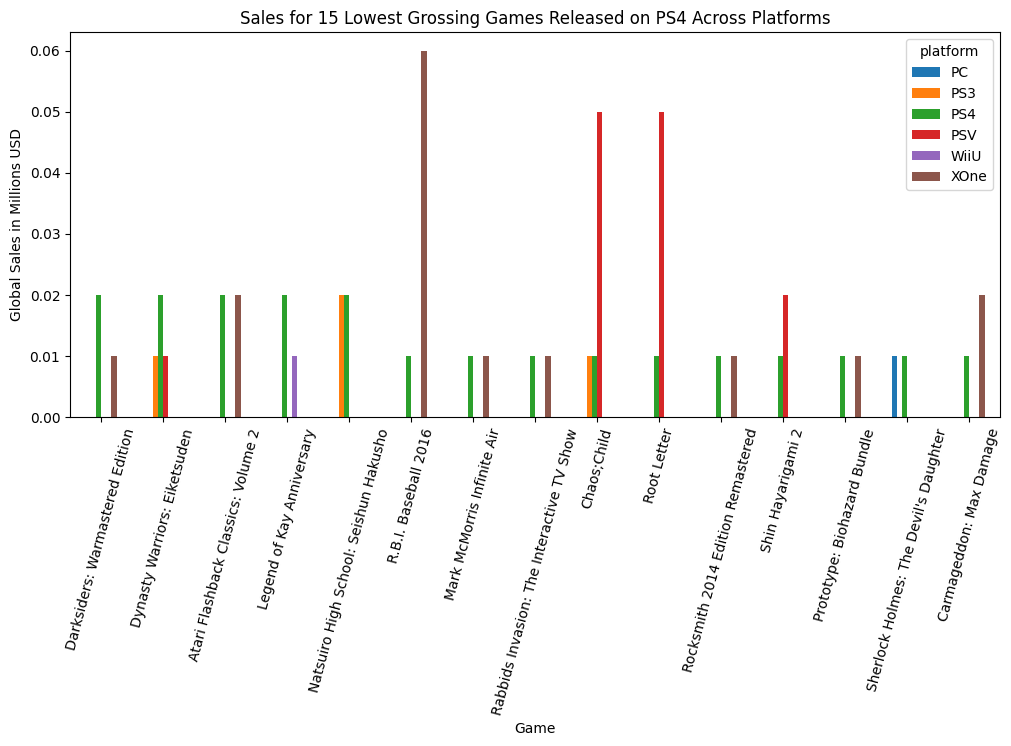

In [32]:
mgrs_bottom15.plot(kind='bar', title='Sales for 15 Lowest Grossing Games Released on PS4 Across Platforms', xlabel='Game', ylabel='Global Sales in Millions USD', figsize=[12, 5], rot=75)
plt.show()

Among the top 15 highest grossing games released on PS4, the games generally outperformed other platforms, with the exception of games initially released on PS3 and rereleased on PS4.  However, in the case of Grand Theft Auto V and Minecraft, which were initially released on PS3 and later rereleased for PS4, XBox 360 outperformed PS4. In the case of GTA5, the games were released on PS4 and XBox 360 simultaneously, so this is significant.  In the case of Minecraft, the XBox 360 release predated the PS3 and later PS4 releases, so this is less significant, other than to note that the initial release of a game deserves the most attention as rereleases do not sell as well.
  
The data for the 15 lowest grossing games released on PS4 also lends some insight as far as what does not sell well.  While in most cases, PS4 still outperformed or performed equally to other platforms, there are some notable exceptions.  RBI Baseball 2016 sold significantly better on XOne despite releasing to both platforms in the same year.  The same is true of Carmaggedon: Max Damage.  While sales for these games were overall lackluster, it is worth keeping in mind, especially based on the above observations regarding XBox 360, that the XBox platforms are significant market competitors.
  
I will now analyze which genres perform best to determine the most effective use of the marketing budget.

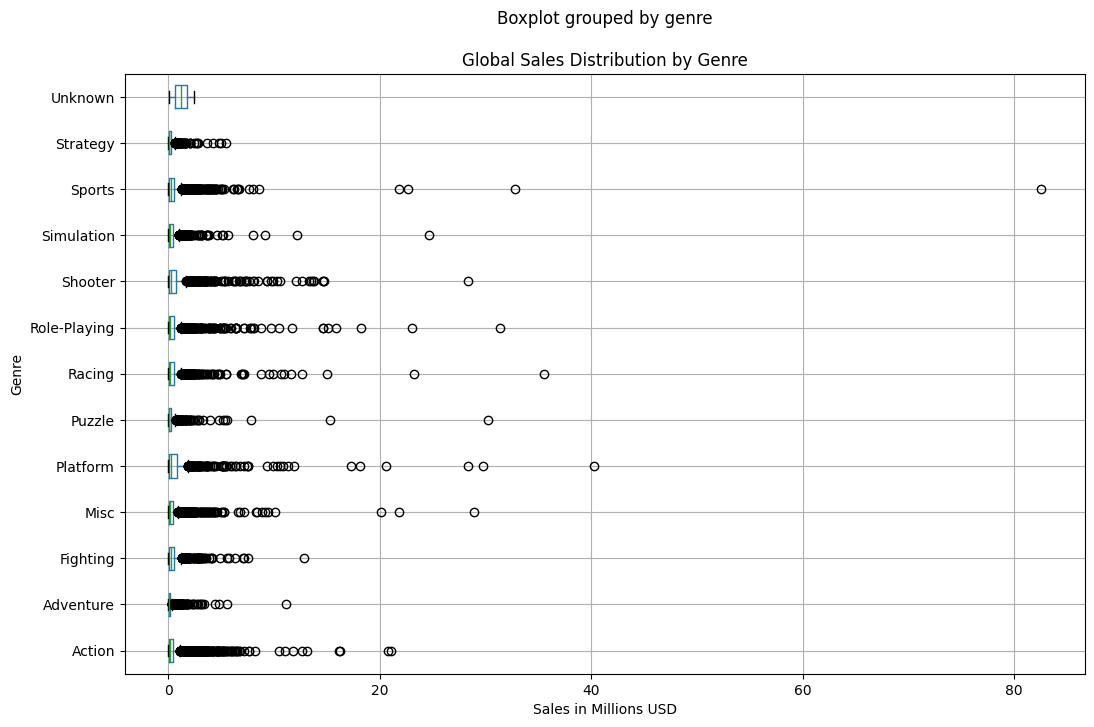

In [33]:
games.boxplot(column='global_sales', by='genre', figsize=[12, 8], vert=False)
plt.title('Global Sales Distribution by Genre')
plt.xlabel('Sales in Millions USD')
plt.ylabel('Genre')
plt.show()

In [34]:
games_by_genre = games.groupby('genre').agg(median_by_genre = ('global_sales', 'median'), mean_by_genre = ('global_sales', 'mean')).reset_index()
games_by_genre

,genre,median_by_genre,mean_by_genre
0,Action,0.19,0.517711
1,Adventure,0.05,0.182341
2,Fighting,0.21,0.527126
3,Misc,0.16,0.458577
4,Platform,0.27,0.932173
5,Puzzle,0.11,0.418224
6,Racing,0.19,0.583403
7,Role-Playing,0.18,0.623872
8,Shooter,0.24,0.795503
9,Simulation,0.15,0.446701


Overall, the video game market has fairly lacklustre sales performance, regardless of genre.  The genres that perform slightly higher than others consistently (based on median sales) are Fighting, Platform, Shooter, and Sports games.  However, as is evident in the boxplot, there are a handful of runaway successes that are worth paying attention to.  Calculating the mean helps us to understand the weight of those outliers and which genres are more likely to generate another runaway success.  Platform games sell especially well, approaching a mean of $1 million, and the second-highest selling game of all time is in this category.  The Shooter and Role-Playing genres are also likely to produce a best seller.  Nonetheless, the highest grossing game of all time was a Sports game and a few other outliers exceeding $20 million suggest this genre is one to keep an eye on.
  
A different way to consider this problem is determining which genres the company <i>should not</i> promote.  Adventure and Strategy games typically do not sell well and have yet to produce an uncommonly successful game.  Fighting games, though decently consistent in producing slightly higher median sales that other genres, are not likely to be a runaway success, having historically not produced such a game, and therefore are more likely to protect the bottom line than generate record sales for Ice.

# Regional Profiles
Video games are marketed and sales are tracked according to three main regions: North America, Europe, and Japan.  In this section, I will analyze how regional differences affect sales by identifying the most popular platforms, most popular genres, and effect of ESRB ratings.

In [35]:
sales_by_region = games.groupby('platform').agg(na_sales = ('na_sales', 'sum'), eu_sales = ('eu_sales', 'sum'), jp_sales = ('jp_sales', 'sum')).reset_index()
regs = ['na_sales', 'eu_sales', 'jp_sales']
def top_5 (df, regs, top_n=5):
    top_platforms = {}
    for reg in regs:
        top_platforms[reg] = df.nlargest(top_n, reg).reset_index(drop=True)
    return top_platforms
top_platforms = top_5(sales_by_region, regs, 5)
for reg, top_5 in top_platforms.items():
    print(f'Top platforms for {reg}:')
    print(top_5['platform'].tolist())

Top platforms for na_sales:
['X360', 'PS2', 'Wii', 'PS3', 'DS']
Top platforms for eu_sales:
['PS2', 'PS3', 'X360', 'Wii', 'PS']
Top platforms for jp_sales:
['DS', 'PS', 'PS2', 'SNES', '3DS']


There is a great deal of overlap in platform popularity (as determined by sales), but each region has their own preferred platforms.  Though its ranking varies, Playstation 2 is among the five most popular platforms in every market.  XBox 360, Wii, and Playstation 3 are popular in North America and Europe, but their popularity does not extend to Japan.  DS is popular in North America and Japan, but not in Europe.  Playstation is popular in Europe and Japan, though not in North America.  Japan in particular has an affinity for SNES and 3DS that does not extend to the North American and European markets.  In general, Japan is a unique market space compared with North America and Europe, which have a significant level of overlap, perhaps due to linguistic commonality.

In [36]:
sbr_genre = games.groupby('genre').agg(na_sales = ('na_sales', 'sum'), eu_sales = ('eu_sales', 'sum'), jp_sales = ('jp_sales', 'sum')).reset_index()
def top_5_gen (df, regs, top_n=5):
    top_genres = {}
    for reg in regs:
        top_genres[reg] = df.nlargest(top_n, reg).reset_index(drop=True)
    return top_genres
top_genres = top_5_gen(sbr_genre, regs, 5)
for reg, top_5_gen in top_genres.items():
    print(f'Top platforms for {reg}:')
    print(top_5_gen['genre'].tolist())

Top platforms for na_sales:
['Action', 'Sports', 'Shooter', 'Platform', 'Misc']
Top platforms for eu_sales:
['Action', 'Sports', 'Shooter', 'Racing', 'Misc']
Top platforms for jp_sales:
['Role-Playing', 'Action', 'Sports', 'Platform', 'Misc']


As with platform, there is a great deal of overlap in preferred genres, as determined by sales data.  Action and Sports are popular in all markets, though slightly lower in the ranking for Japan.  "Misc" genre games are also popular across all markets, though this category is vague and may encompass a great deal of game types.  Shooter games are popular in North America and Europe, though not in Japan, likely due to cultural difference as guns are not legal in Japan outside of the police and the military.  Platform games are the 4th most popular genre in both North America and Japan, though not in Europe, where Racing games claim the 4th rank.  Role-Playing games are the most popular genre in Japan, though the genre claims no major market share in North America and Europe.  If looking for a hit across all markets, Action and Sports games are the way to go.
  
I will now analyze the impact of ESRB ratings on sales.

In [37]:
sbr_esrb = games.groupby('rating').agg(na_sales = ('na_sales', 'sum'), eu_sales = ('eu_sales', 'sum'), jp_sales = ('jp_sales', 'sum')).reset_index()
def top_5_esrb (df, regs, top_n=5):
    top_esrb = {}
    for reg in regs:
        top_esrb[reg] = df.nlargest(top_n, reg).reset_index(drop=True)
    return top_esrb
top_esrb = top_5_esrb(sbr_esrb, regs, 5)
for reg, top_5_esrb in top_esrb.items():
    print(f'Top ratings for {reg}:')
    print(top_5_esrb['rating'].tolist())

Top ratings for na_sales:
['E', 'Unknown', 'T', 'M', 'E10+']
Top ratings for eu_sales:
['E', 'Unknown', 'M', 'T', 'E10+']
Top ratings for jp_sales:
['Unknown', 'E', 'T', 'M', 'E10+']


For the most part, rating seems to have minimal impact on sales across different regions.  Many ratings are unrecorded in the data set, which obscures the analysis some, though this is to be expected especially with games dating back to before ESRB ratings were established in 1994.  They may also be related to ratings that have since been phased out, such as K-A, which was the initial term for games that are today labeled as E.  If we ignore 'Unknown' ratings, E-rated games are the most popular in all markets, likely due to a fair proportion of child gamers.  Teen games are second-highest followed by Mature games in North America and Japan, while for Europe, these rankings are reversed.  E10+ has the lowest ranking in terms of popularity in all markets, though this may be a result of this rating level not being introduced until 2005.  For a more precise analysis, I will rerun the function for only those games introduced since 2005 with known ratings.

In [38]:
new_games = games[games['year_of_release'] >= 2005].reset_index()
new_games_filtered = new_games[new_games['rating'] != 'Unknown'].reset_index()
new_games_sorted = new_games_filtered.groupby('rating').agg(na_sales = ('na_sales', 'sum'), eu_sales = ('eu_sales', 'sum'), jp_sales = ('jp_sales', 'sum')).reset_index()
def top_5_esrb (df, regs, top_n=5):
    top_esrb = {}
    for reg in regs:
        top_esrb[reg] = df.nlargest(top_n, reg).reset_index(drop=True)
    return top_esrb
top_esrb = top_5_esrb(new_games_sorted, regs, 5)
for reg, top_5_esrb in top_esrb.items():
    print(f'Top ratings for {reg}:')
    print(top_5_esrb['rating'].tolist())

Top ratings for na_sales:
['E', 'M', 'T', 'E10+', 'EC']
Top ratings for eu_sales:
['E', 'M', 'T', 'E10+', 'AO']
Top ratings for jp_sales:
['E', 'T', 'M', 'E10+', 'AO']


This query provides a more helpful picture of the current video game rating market shares and for the most part confirms the previous analysis.  Interestingly, looking only at the previous 11 years, M-rated games have surpassed T-rated games in the North American market, perhaps as a generation of players has come of age.  Another interesting observation this data lends is that AO-rated games are the 5th most popular in Europe and Japan, while EC-rated games hold that spot in North America.  For games designed for the Early Childhood market, marketing is best focused on North America.  Likewise, Adults Only game marketing campaigns are more likely to generate sales in Europe and Japan.

# Testing Hypotheses
Per the marketing team's requests, I will conclude this analysis by checking whether average user scores are the same for XBox One and PC games and whether they are different for Action and Sports games.
  
I will begin first by checking average user scores of XBox One vs PC games using a typical alpha threshold of 0.05 to ensure any difference identified is statistically significant and worth rejecting the null hypothesis.
  
  Null Hypothesis: The average user scores of XBox One and PC games are equal.
  
  Alternative Hypothesis: The average user scores of XBox One and PC games are not equal.

In [39]:
xone = games[games['platform'] == 'XOne']
pc = games[games['platform'] == 'PC']
xone_scores = xone['user_score'].values
pc_scores = pc['user_score'].values
alpha = 0.05
results = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print('We cannot reject the null hypothesis.')
xone_mean = xone_scores.mean()
pc_mean = pc_scores.mean()
print(f'XBox One\'s mean user score is {xone_mean:.2f}.  PC\'s mean user score is {pc_mean:.2f}.')

p-value: 2.1481815500307215e-09
We reject the null hypothesis.
XBox One's mean user score is 6.62.  PC's mean user score is 7.17.


The average user scores of XBox One and PC games are not equal.
  
Now, I will see if user rating for the Action and Sports genres are different, again using a typical 0.05 alpha value.
  
The Null Hypothesis: The average user scores of the  Action and Sports genres are equal.
  
The Alternative Hypothesis: The average user scores of the Action and Sports genres are not equal.

In [40]:
action = games[games['genre'] == 'Action']
sports = games[games['genre'] == 'Sports']
action_scores = action['user_score'].values
sports_scores = sports['user_score'].values
alpha = 0.05
results = stats.ttest_ind(action_scores, sports_scores, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print('We cannot reject the null hypothesis.')
action_mean = action_scores.mean()
sports_mean = sports_scores.mean()
print(f'Action games receive a mean user score of {action_mean: .2f}.  Sports games receive a mean user score of {sports_mean: .2f}.')

p-value: 0.0014263680141120892
We reject the null hypothesis.
Action games receive a mean user score of  7.17.  Sports games receive a mean user score of  7.27.


The average user scores of the Action and Sports genres are not equal.

# Conclusion
This analysis has interpreted data on 16k video games released between 1980-2016 to help Ice plan its advertising campaigns for 2017.  For some portions of the analysis, I focused only on games released since 1998, when the number of video games released was comparable to the number of games released today.
  
To maximize profits, I recommend that the marketing team focus efforts on promoting games for the PlayStation 4 as it is currently the most popular platfor and has historically had global popularity, though XBox platforms do outperform PlayStation in some instances.  The team should stay alert for information about upcoming handheld and console releases as these have historically generated significant revenue.  PC games are not nearly as profitable, despite the longevity of this platform.
  
Critic scores show a moderate correlation with sales and should receive some consideration when selecting which games to market.  User scores, however, have a weak negative correlation and can be disregarded.  Initial game releases are more profitable than rereleases.

Genre has minimal impact on sales, though Fighting, Platform, Shooter, and Sports games have slightly higher median sales.  Action games also sell well across all markets.  Shooter games are popular only in North America and Europe, Platform games in North America and Japan.  Role Playing games are popular only in Japan, while Racing games are popular only in Europe.  Adventure and Strategy games typically underperform.

E-rated games are top-selling across all regions, while preferences for other rating categories vary by market.

Overall, I recommend that the marketing team prioritize PlayStation 4 games, emphasize initial releases, and consider regional genre preferences to drive sales.  The ideal release for global success in 2017 would be a newly-released E-rated PlayStation 4 game in the Fighting, Platform, Shooter, Sports, or Action genres.